# Case Study: Fluorination of Allylic Alcohols (JACS 2016)

Goal: Test if RCCR can uncover clusters in a small dataset

In [1]:
import sys

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
plt.rcParams.update(plt.rcParamsDefault)

sys.path.append('../src')
import rccr

In [2]:
df = pd.read_excel('../data/Neel_Toste_JACS.xlsx')

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:],df['ddG'], test_size=0.1, random_state=25)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA().fit(X_train_scaled)
pcs = pca.transform(X_train_scaled)[:,:10]
pcs_test = pca.transform(X_test_scaled)[:,:10]

In [3]:
labels = rccr.get_average_clusters(pcs,y_train.values,2,80,5, plot=False)

Initial r2 0.374918862892441
Initial r2 0.374918862892441
Initial r2 0.374918862892441
Initial r2 0.374918862892441
Iteration 0 0.7318685444485817
Iteration 0 0.6917204494308888
Iteration 0 0.7022427249839605
Iteration 0 0.6710408553186454
Iteration 1 0.7921198624409383
Iteration 1 0.7642472871870003
Iteration 1 0.7867007926797258
Iteration 1 0.6918496196220731
Iteration 2 0.7921198624409383
Iteration 2 0.7834975370372435
Iteration 2 0.7867007926797258
Iteration 2 0.6918496196220731
Iteration 3 0.7867007926797258
Iteration 3 0.7921198624409383
Iteration 3 0.7867007926797258
Iteration 3 0.6918496196220731
Final r2 0.7867007926797258
Final r2 0.7921198624409383
Final r2 0.7867007926797258
Final r2 0.6918496196220731
Initial r2 0.374918862892441
Initial r2 0.374918862892441
Initial r2 0.374918862892441
Initial r2 0.374918862892441
Iteration 0 0.7763379437781976
Iteration 0 0.7983082489641458
Iteration 0 0.7668271016622886
Iteration 0 0.7087638416155764
Iteration 1 0.805101281397339
Iterat

Cluster 0 R2 0.7842874697528749 coeff [0.2164812033527883][0] int -0.5375956701166691
Cluster 1 R2 0.8259150930418032 coeff [0.26430372752308645][1] int 0.18183809880651974


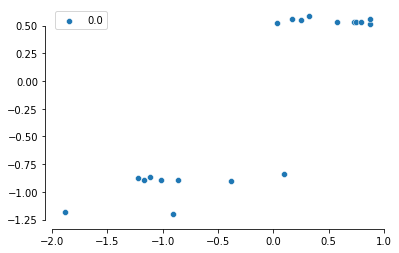

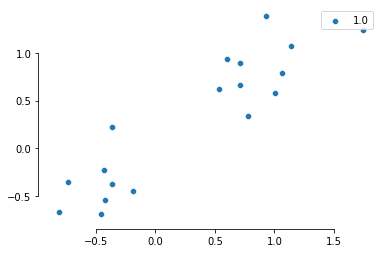

Overall R2 0.8174206093734453


In [4]:
cr_meas, cr_pred, clusters = rccr.cr_fit(pcs,y_train.values,labels=labels)

for cluster in np.unique(clusters):
    index = clusters ==  cluster
    sns.scatterplot(x=cr_meas[tuple([index[:,0]])],y=cr_pred[tuple([index[:,0]])], label=cluster)
    sns.despine(offset=5, trim=True)
    plt.show()  



print("Overall R2 " + str(r2_score(cr_meas, cr_pred)))

In [5]:
array = rccr.get_possible_clusters(pcs,y_train.values, labels=labels, scoring='MAE')

from sklearn.preprocessing import OneHotEncoder

new_labels_array = OneHotEncoder(sparse=False).fit_transform(labels.reshape(-1,1))

final_array = new_labels_array+array

final_array[final_array == 2] = 1

In [6]:
model = RandomForestClassifier().fit(X_train_scaled,final_array)
test_label_array = model.predict(X_test_scaled)

In [8]:
train_df_labelled = pd.DataFrame(labels, columns=["Cluster"]).join(X_train.reset_index(drop=True))
test_df_labelled = pd.DataFrame(test_label_array[:,1], columns=["Cluster"]).join(X_test.reset_index(drop=True))

visualization_df = pd.concat((train_df_labelled,test_df_labelled))

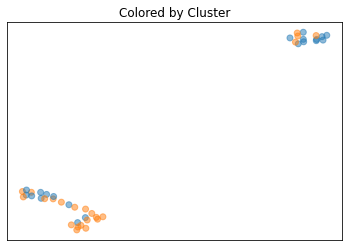

In [10]:
import umap
from sklearn.preprocessing import LabelEncoder as LE

data = umap.UMAP(random_state=42).fit_transform(visualization_df.iloc[:,14:])


plt.scatter(data[:,0],data[:,1], c=[sns.color_palette()[x] for x in LE().fit_transform(visualization_df['Cattor'])], alpha=0.5)
plt.title("Chemical Space of Catalysts")
plt.xticks([])
plt.yticks([])
plt.show()

plt.scatter(data[:,0],data[:,1], c=[sns.color_palette()[x] for x in LE().fit_transform(visualization_df['Cluster'])], alpha=0.5)
plt.title("Colored by Cluster")
plt.xticks([])
plt.yticks([])
plt.show()